In [ ]:
# Use United State E-Commerce Records 2020 data from Kaggle
# https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020

# Load Data

In [2]:
# Import library
import pandas as pd

# Load data
data = pd.read_csv('us_2020.csv', engine='python', encoding='ISO-8859-1')

# View data
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


# Reformat Timestamp

In [3]:
import dateutil
from datetime import datetime as dt
from pytz import utc

# Add new column datetime, month, and year
data['datetime'] = data['Order Date'].apply(lambda x: dateutil.parser.parse(x).timestamp())
data['month'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
data['year'] = data['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

# View data
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,datetime,month,year
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1.577837e+09,1,2020
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1.577837e+09,1,2020
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,1.577837e+09,1,2020
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1.577837e+09,1,2020
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1.577837e+09,1,2020


# Create Cohort

In [4]:
# Create format column first_cohort
data['cohort'] = data.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)

# Merge data
cohorts = data.groupby('Customer ID')['cohort'].min().reset_index()
cohorts.columns = ['Customer ID', 'first_cohort']

data = data.merge(cohorts, on='Customer ID', how='left')

# View data merge
cohorts.head()

,Customer ID,first_cohort
0,AA-10315,202006
1,AA-10375,202007
2,AA-10480,202004
3,AA-10645,202005
4,AB-10060,202005


In [5]:
# View data with column first_cohort
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,datetime,month,year,cohort,first_cohort
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1.577837e+09,1,2020,202001,202001
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1.577837e+09,1,2020,202001,202001
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,1.577837e+09,1,2020,202001,202001
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1.577837e+09,1,2020,202001,202001
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1.577837e+09,1,2020,202001,202001


# Header for Every Cohort

In [6]:
# Create header for every cohort
headers = data['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

# View data headers
headers

[202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012]

# Pivot Data by Cohort

In [7]:
# View data
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,datetime,month,year,cohort,first_cohort
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1.577837e+09,1,2020,202001,202001
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1.577837e+09,1,2020,202001,202001
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,1.577837e+09,1,2020,202001,202001
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1.577837e+09,1,2020,202001,202001
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1.577837e+09,1,2020,202001,202001


In [8]:
# Remove null data
data.dropna(inplace=True)

In [9]:
# Make new column 'cohort_distance'
data['cohort_distance'] = data.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

# View data
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,datetime,month,year,cohort,first_cohort,cohort_distance
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,48.896,4,0.2,8.5568,1.577837e+09,1,2020,202001,202001,0
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,474.430,11,0.0,199.2606,1.577837e+09,1,2020,202001,202001,0
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,3.600,2,0.0,1.7280,1.577837e+09,1,2020,202001,202001,0
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,454.560,5,0.2,-107.9580,1.577837e+09,1,2020,202001,202001,0
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,141.420,5,0.6,-187.3815,1.577837e+09,1,2020,202001,202001,0


In [10]:
# Make pivot cohort
cohort_pivot = pd.pivot_table(data,
                              index='first_cohort',
                              columns='cohort_distance',
                              values='Customer ID',
                              aggfunc=pd.Series.nunique)

# View pivot Cohort
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11
first_cohort,,,,,,,,,,,,
202001,96.0,10.0,18.0,23.0,7.0,13.0,11.0,19.0,22.0,13.0,17.0,19.0
202002,90.0,13.0,13.0,8.0,11.0,15.0,15.0,18.0,15.0,23.0,15.0,NaN
202003,111.0,24.0,13.0,17.0,18.0,10.0,22.0,17.0,26.0,20.0,NaN,NaN
202004,65.0,14.0,14.0,11.0,12.0,19.0,11.0,18.0,14.0,NaN,NaN,NaN
202005,63.0,9.0,7.0,10.0,10.0,9.0,19.0,13.0,NaN,NaN,NaN,NaN
202006,56.0,6.0,12.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
202007,42.0,9.0,9.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
202008,29.0,5.0,6.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202009,48.0,9.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Divide each value by the first row
cohort_pivot = cohort_pivot.div(cohort_pivot[0],axis=0)

# View data
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11
first_cohort,,,,,,,,,,,,
202001,1.0,0.104167,0.187500,0.239583,0.072917,0.135417,0.114583,0.197917,0.229167,0.135417,0.177083,0.197917
202002,1.0,0.144444,0.144444,0.088889,0.122222,0.166667,0.166667,0.200000,0.166667,0.255556,0.166667,NaN
202003,1.0,0.216216,0.117117,0.153153,0.162162,0.090090,0.198198,0.153153,0.234234,0.180180,NaN,NaN
202004,1.0,0.215385,0.215385,0.169231,0.184615,0.292308,0.169231,0.276923,0.215385,NaN,NaN,NaN
202005,1.0,0.142857,0.111111,0.158730,0.158730,0.142857,0.301587,0.206349,NaN,NaN,NaN,NaN
202006,1.0,0.107143,0.214286,0.232143,0.178571,0.214286,0.196429,NaN,NaN,NaN,NaN,NaN
202007,1.0,0.214286,0.214286,0.095238,0.166667,0.119048,NaN,NaN,NaN,NaN,NaN,NaN
202008,1.0,0.172414,0.206897,0.172414,0.241379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202009,1.0,0.187500,0.312500,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# View Pivot using Heatmap

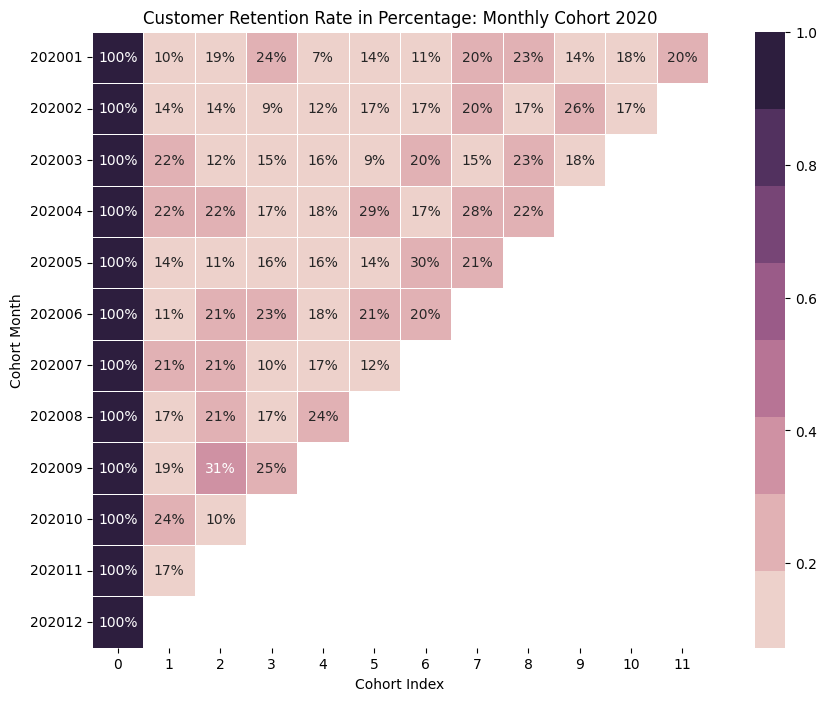

In [13]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt='.0%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(8))
plt.title('Customer Retention Rate in Percentage: Monthly Cohort 2020')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')

plt.show()

Customer retention rate was highest at 31% for the two-month cohort starting in September 2020 and lowest at 7% for the fourth-month cohort starting in January 2020. Although there was some decline in other cohort indices, the overall customer retention rate has improved.